<a href="https://colab.research.google.com/github/utkrisht2000/Omicron-Sentiment-Analysis/blob/main/Omicron_Tweets_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import Libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install pycountry
import pycountry
lemmatizer = WordNetLemmatizer()
import nltk
import nltk
nltk.download('all')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Load Data

df = pd.read_csv('/content/drive/MyDrive/Projects/Omicron_Tweets_Sentiment_Analysis/omicron.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [44]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17046 non-null  int64 
 1   user_name         17046 non-null  object
 2   user_location     13434 non-null  object
 3   user_description  15716 non-null  object
 4   user_created      17046 non-null  object
 5   user_followers    17046 non-null  int64 
 6   user_friends      17046 non-null  int64 
 7   user_favourites   17046 non-null  int64 
 8   user_verified     17046 non-null  bool  
 9   date              17046 non-null  object
 10  text              17046 non-null  object
 11  hashtags          10219 non-null  object
 12  source            17046 non-null  object
 13  retweets          17046 non-null  int64 
 14  favorites         17046 non-null  int64 
 15  is_retweet        17046 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


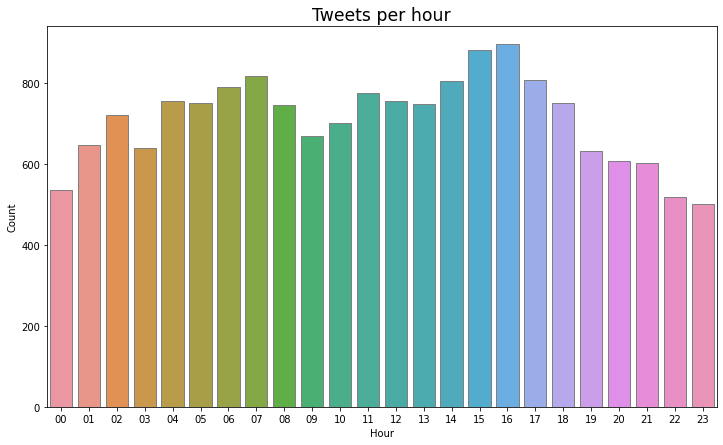

In [45]:
# Tweets Per Hour Graph

df['date']=pd.to_datetime(df['date'])
tweets_per_hr = df['date'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, edgecolor='grey')
plt.title('Tweets per hour', size='xx-large')
plt.show()

In [46]:
# User Locations

df['user_location'].value_counts()[:10]

Los Angeles, CA                 2658
India                            474
USA                              325
In Your Mind Now                 211
Chandigarh                       210
United States                    180
Canada                           180
New York City, New York, USA     156
Hong Kong                        122
New Delhi, India                 106
Name: user_location, dtype: int64

In [47]:
# Extract Country Name

location = [loc for loc in df['user_location'] if type(loc)==str]
country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:5]

['United States', 'Mexico', 'United States', 'United States', 'Germany']

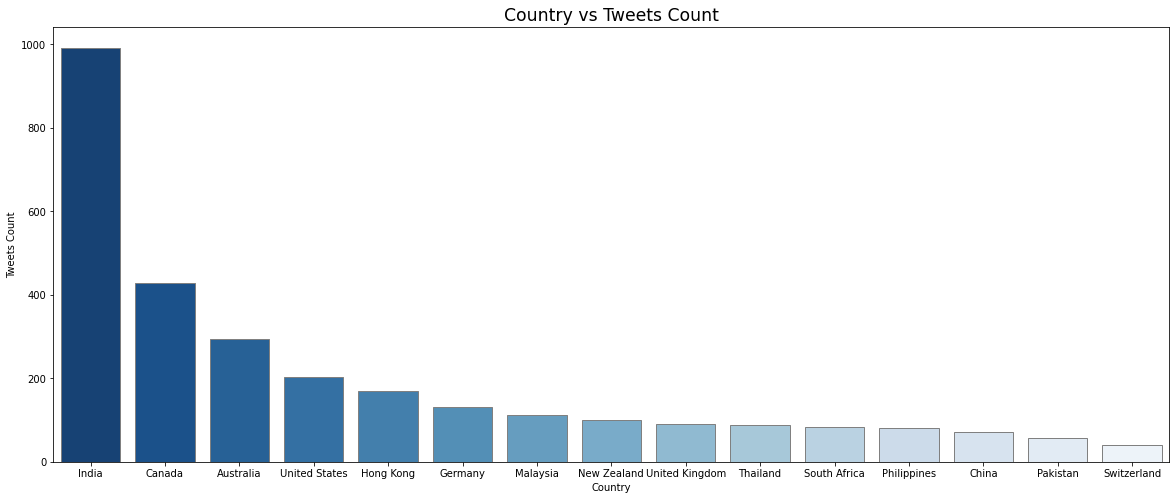

In [48]:
# # Country Vs Tweets Count

count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1
country_df = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
country_df = country_df.sort_values(by = 'Tweets Count', ascending=False)
country_df=country_df[:15] # top 15 countries

# plot the data
plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='Blues_r', edgecolor='grey');
plt.savefig('/content/drive/MyDrive/Projects/Omicron_Tweets_Sentiment_Analysis/country_vs_tweet.jpg',dpi=720)
plt.show()

In [49]:
# Dataset Preprocessing

def preprocess(text):
    text = text.replace('\n', ' ')
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    text = re.sub('@[\w]+', '',text)
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    re.sub("\s\s+", " ", text)
    text = text.strip().lower()
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    # Stopword Removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=text.replace('covid19','covid')
    return text

def no_spam(text):
    if 'subscri' in text:
        text=''
    return text

In [50]:
# Apply Functions

df['text']= df['text'].apply(preprocess)
df['text']= df['text'].apply(no_spam)

In [51]:
# Emoji Handling

def demoji(text):
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
    return text

df['text']= df['text'].apply(demoji)

In [52]:
# Emoji Meaning Declaration

def convert(text):
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval','🤨':'suspicion',
         '😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad','🤕':'sad','😔':'sad','😣':'sad','🙁':'sad',
         '😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad','😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad',
         '😩':'sad','🥺':'sad','😦':'sad','😫':'sad','😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection',
         '😁':'smile','😂':'laugh','😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text

df['senti_text']= df['text'].apply(convert)

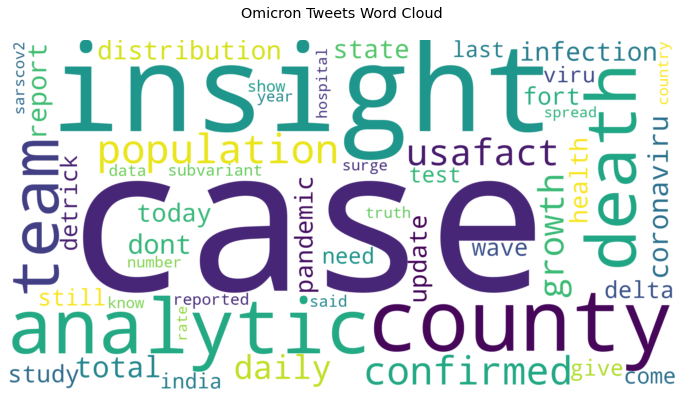

In [53]:
# Word Cloud
text = " ".join(tweet for tweet in df.text)
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
plt.savefig('/content/drive/MyDrive/Projects/Omicron_Tweets_Sentiment_Analysis/Omicron.jpg',dpi=720)
plt.show()

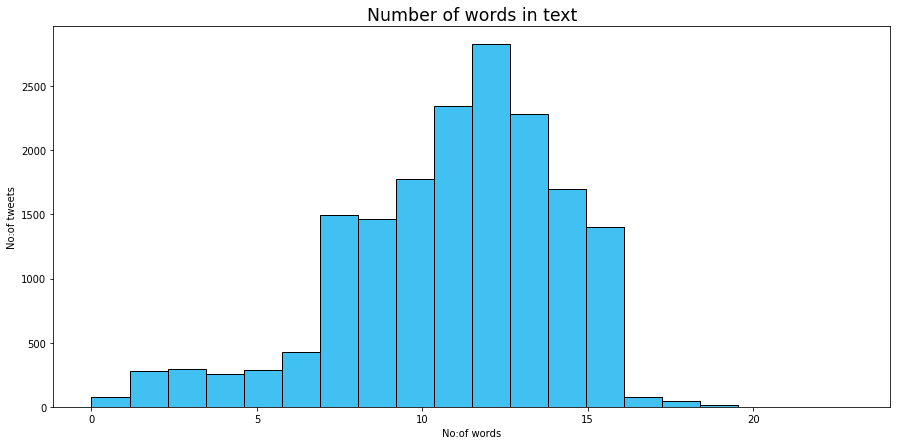

In [54]:
# Word Count

word_count = [len(text.split()) for text in df.text]
df['word_count'] = word_count
plt.figure(figsize=(15,7))
ax=sns.histplot(x='word_count', data=df, bins=20, color='#00acee')
plt.title('Number of words in text',size='xx-large')
plt.xlabel('No:of words')
plt.ylabel('No:of tweets')
plt.show()

In [55]:
# Dataset Handling

df=df[df['word_count']>2]
df=df[df['word_count']<17]

In [56]:
# Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in df["senti_text"]]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in df["senti_text"]]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in df["senti_text"]]
df1 = df[["text", "Positive","Neutral", "Negative"]]
df1.head()


,text,Positive,Neutral,Negative
0,daily u confirmed covid case county 20220208...,0.000,1.000,0.0
1,cdc say number fully vaccinated omicron patien...,0.115,0.885,0.0
2,daily u confirmed covid case county la 20220...,0.000,1.000,0.0
3,daily u confirmed covid case county la 20220...,0.000,1.000,0.0
4,beijing2022 winterolympics already underway u ...,0.211,0.789,0.0


In [57]:
# Calculate Sentiment Score

pos = sum(df1["Positive"])
neu = sum(df1["Neutral"])
neg = sum(df1["Negative"])

def sentiment_score(pos, neu, neg):
    if (pos>neu) and (pos>neg):
        print("Positive :)")
    elif (neu>pos) and (neu>neg):
        print("Neutral :|")
    else:
        print("Negative :(")
        
sentiment_score(pos, neu, neg)

Neutral :|


In [58]:
# Total Positive, Negative, Neutral Tweet

sentiments_vader = []
for tweet in df.senti_text:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_vader.append(max(sentiment_dict , key=sentiment_dict.get))
df['sentiment_vader'] = sentiments_vader
df['sentiment_vader'].value_counts()

neu    15715
pos      457
neg      388
Name: sentiment_vader, dtype: int64

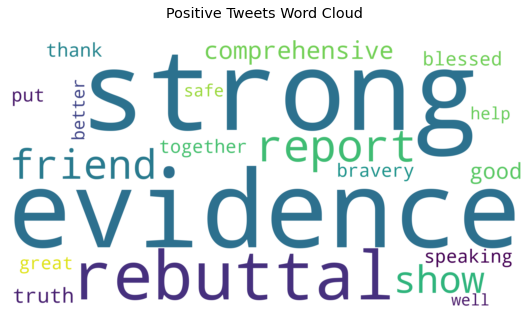

In [59]:
# Word Cloud Positive Words

pos_tweets = " ".join(sentiment for sentiment in df[df['sentiment_vader']=='pos']['text'])
stopwords_p = STOPWORDS
stopwords_p.update(('omicron', 'covid', 'u', 'ha', 'amp','one','people','variant', 'mask'))
word_cloud1 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_p, #min_word_length=4,
                       width=2048, height=1080).generate(pos_tweets)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Word Cloud\n', size='x-large')
plt.savefig('/content/drive/MyDrive/Projects/Omicron_Tweets_Sentiment_Analysis/positive.jpg',dpi=720)
plt.show()

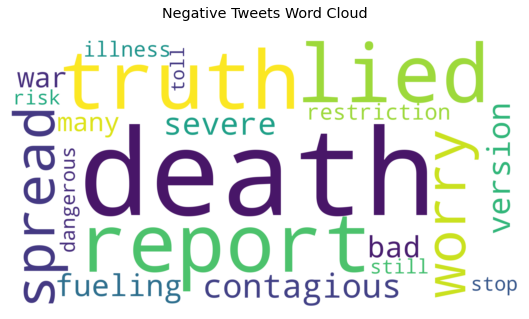

In [60]:
# Word Cloud Negative Words

neg_tweets = " ".join(sentiment for sentiment in df[df['sentiment_vader']=='neg']['text'])
stopwords_n = STOPWORDS
stopwords_n.update(('vaccine','news','im','time','world')) # 
word_cloud2 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_n,
                       width=2048, height=1080).generate(neg_tweets)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Word Cloud\n', size='x-large')
plt.savefig('/content/drive/MyDrive/Projects/Omicron_Tweets_Sentiment_Analysis/negative.jpg',dpi=720)
plt.show()